In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# https://github.com/oldmonkABA/optimal_histogram_bin_width
def hist_optimize_bins(data):
    data_max = max(data) #lower end of data
    data_min = min(data) #upper end of data
    n_min = 2   #Minimum number of bins Ideal value = 2
    n_max = 200  #Maximum number of bins  Ideal value =200
    n_shift = 30     #number of shifts Ideal value = 30
    N = np.array(range(n_min,n_max))
    D = float(data_max-data_min)/N    #Bin width vector
    Cs = np.zeros((len(D),n_shift)) #Cost function vector
    #Computation of the cost function
    for i in range(np.size(N)):
        shift = np.linspace(0,D[i],n_shift)
        for j in range(n_shift):
            edges = np.linspace(data_min+shift[j]-D[i]/2,data_max+shift[j]-D[i]/2,N[i]+1) # shift the Bin edges
            binindex = np.digitize(data,edges) #Find binindex of each data point
            ki=np.bincount(binindex)[1:N[i]+1] #Find number of points in each bin
            k = np.mean(ki) #Mean of event count
            v = sum((ki-k)**2)/N[i] #Variance of event count
            Cs[i,j]+= (2*k-v)/((D[i])**2) #The cost Function

    C=Cs.mean(1)

    #Optimal Bin Size Selection
    cmin = C.min()
    idx  = np.where(C==cmin)
    idx = idx[0][0]
    Optimal_Bin_Number = N[idx]
    # Optimal_Bin_Width =  D[idx]

    return Optimal_Bin_Number

In [ ]:
import socket
def get_Host_name_IP():
    try:
        host_name = socket.gethostname()
        host_ip = socket.gethostbyname(host_name)
        print("Hostname :  ",host_name)
        print("IP : ",host_ip)
    except:
        print("Unable to get Hostname and IP")

get_Host_name_IP()

Hostname :   f75452d946a6
IP :  172.28.0.12


In [ ]:
import platform
system_conf = platform.uname()
print("Computer Config")
print(f"System: {system_conf.system}")
print(f"Node Name: {system_conf.node}")
print(f"Release: {system_conf.release}")
print(f"Version: {system_conf.version}")
print(f"Machine: {system_conf.machine}")
print(f"Processor: {system_conf.processor}")

Computer Config
System: Linux
Node Name: f75452d946a6
Release: 6.1.58+
Version: #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
Machine: x86_64
Processor: x86_64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content'

Ratings Dataset Preprocessing

In [ ]:
rating_df = pd.read_csv('/content/drive/MyDrive/Cloud_Computing/data/animelists_cleaned.csv')

In [ ]:
rating_df.shape

(1518226, 3)

In [ ]:
rating_df.head(10)

,user_id,anime_id,my_score
0,2485327,59,6
1,2485327,74,7
2,2485327,120,8
3,2485327,178,5
4,2485327,210,7
5,2485327,232,9
6,2485327,249,7
7,2485327,269,8
8,2485327,853,9
9,2485327,857,7


In [ ]:
rating_df = rating_df.dropna()

In [ ]:
rating_df.shape

(1518226, 3)

Text(0, 0.5, 'Frequency')

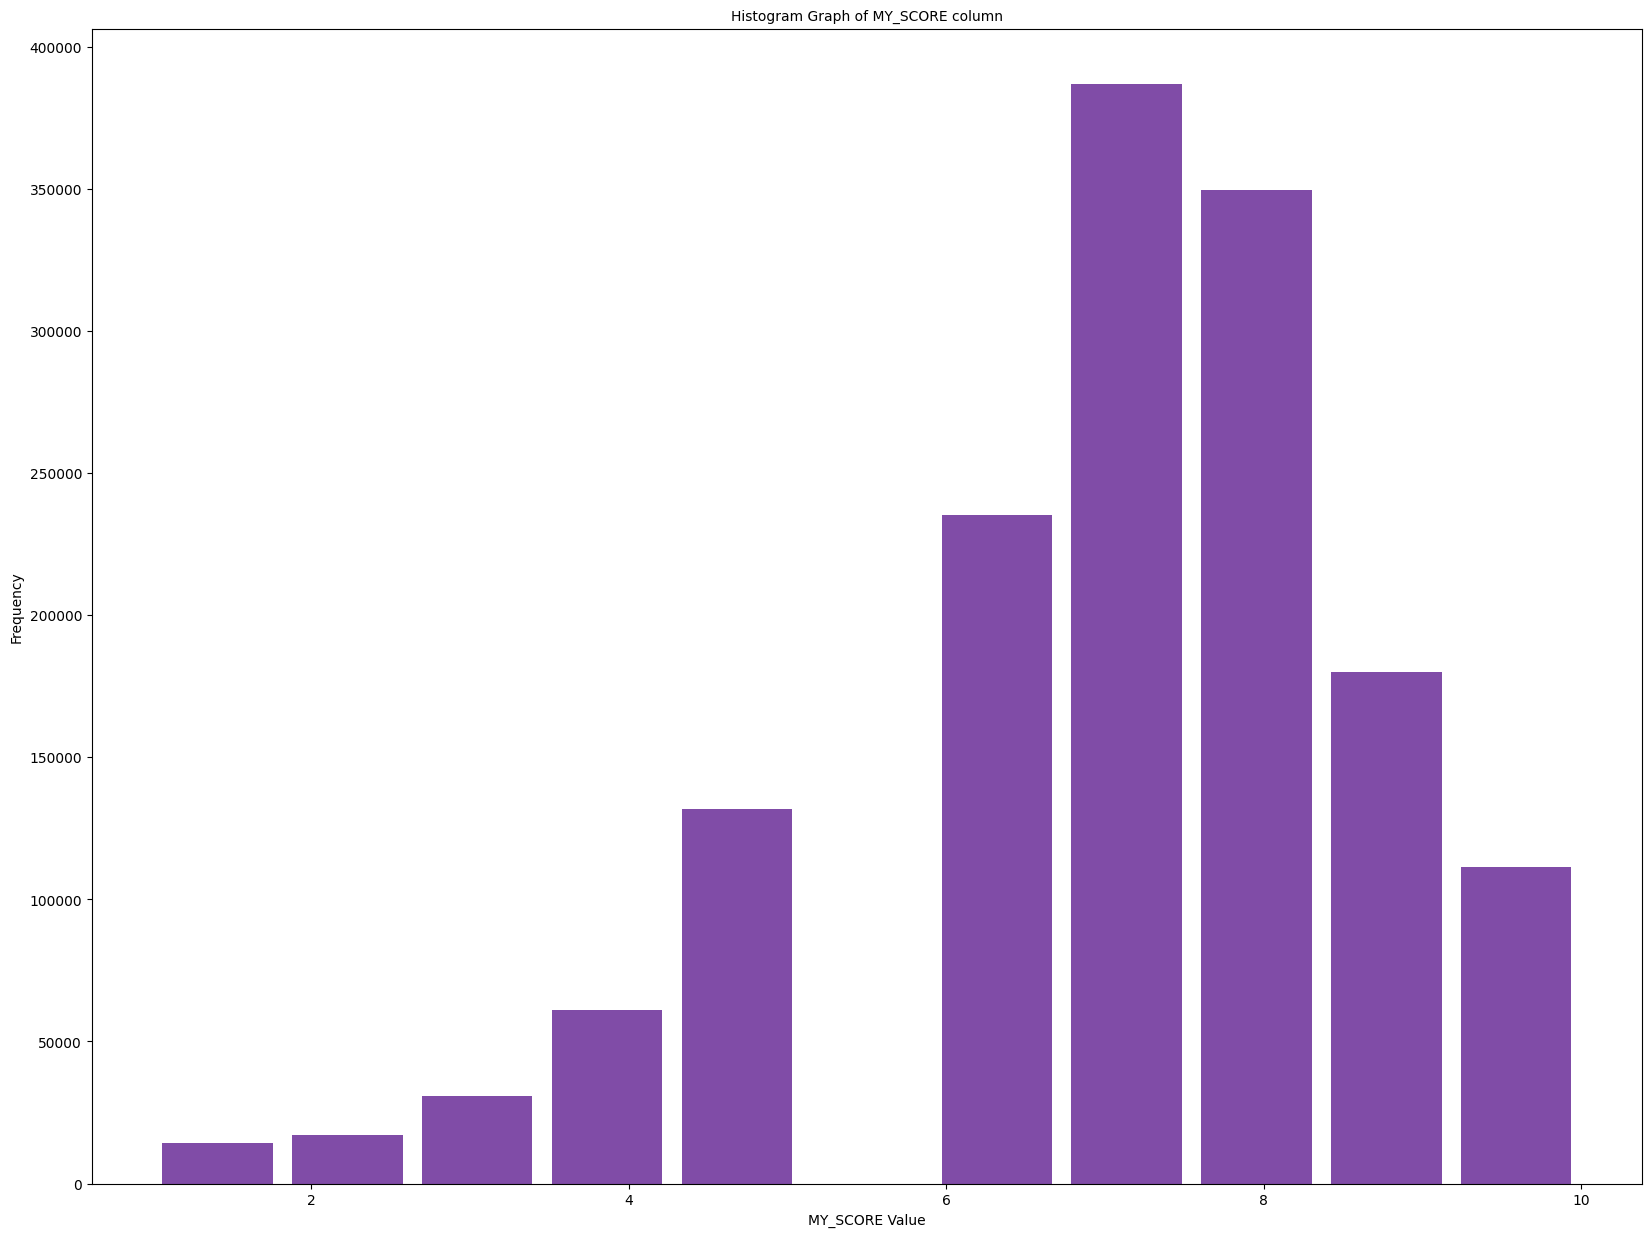

In [ ]:
data = rating_df['my_score']
col = 'my_score'
plt.figure(figsize=(20, 15))
plt.hist(data, bins=11, alpha=0.7, rwidth=0.85, color='indigo')
plt.xticks(rotation=0)
plt.title('Histogram Graph of '+col.upper()+' column',fontsize=10)
plt.xlabel(col.upper()+' Value',fontsize=10)
plt.ylabel('Frequency',fontsize=10)

In [ ]:
rating_df = rating_df[rating_df.my_score != 0.0]

In [ ]:
rating_df.shape

(1518226, 3)

Text(0, 0.5, 'Frequency')

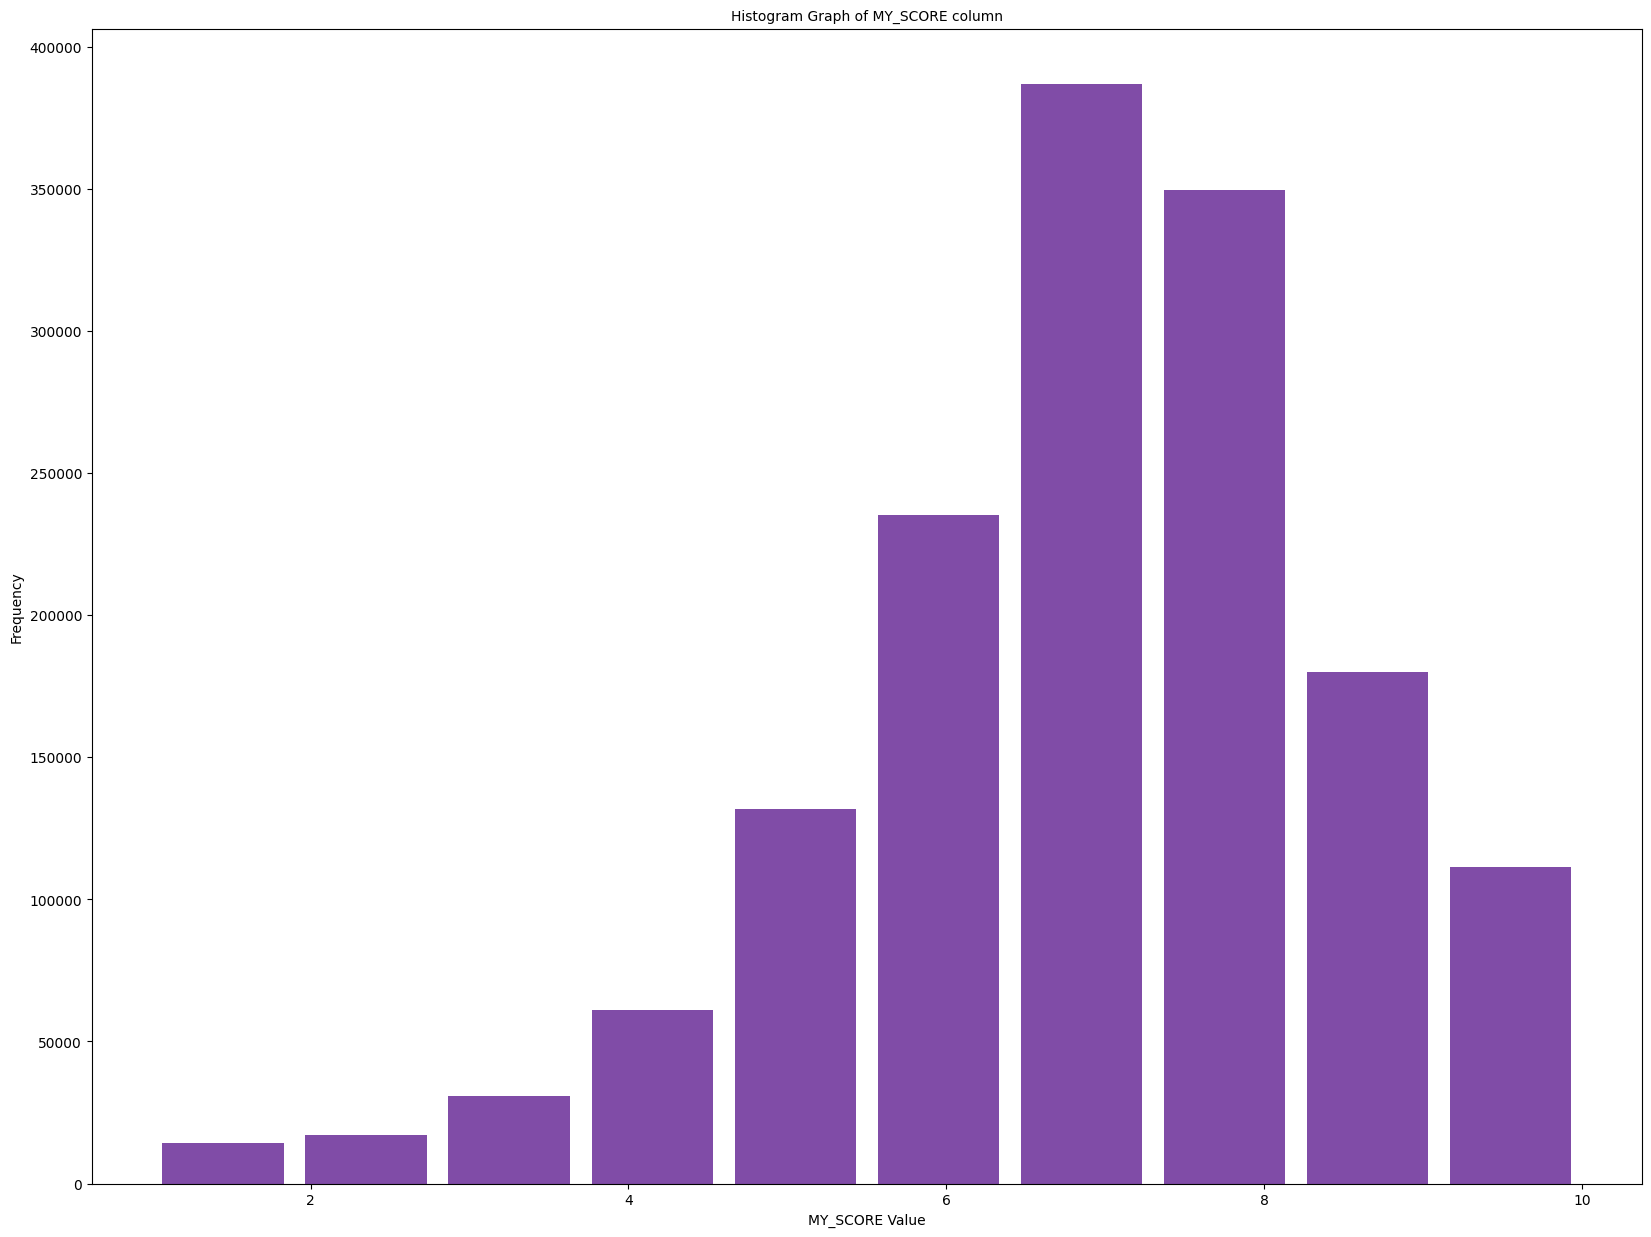

In [ ]:
data = rating_df['my_score']
col = 'my_score'
plt.figure(figsize=(20, 15))
plt.hist(data, bins=10, alpha=0.7, rwidth=0.85, color='indigo')
plt.xticks(rotation=0)
plt.title('Histogram Graph of '+col.upper()+' column',fontsize=10)
plt.xlabel(col.upper()+' Value',fontsize=10)
plt.ylabel('Frequency',fontsize=10)

In [ ]:
usernames_with_ratingCounts = dict(rating_df['user_id'].value_counts())

In [ ]:
len(usernames_with_ratingCounts)

1128

In [ ]:
max_rating_count = max(usernames_with_ratingCounts.values())
max_rating_count

3785

Text(0, 0.5, 'Frequency')

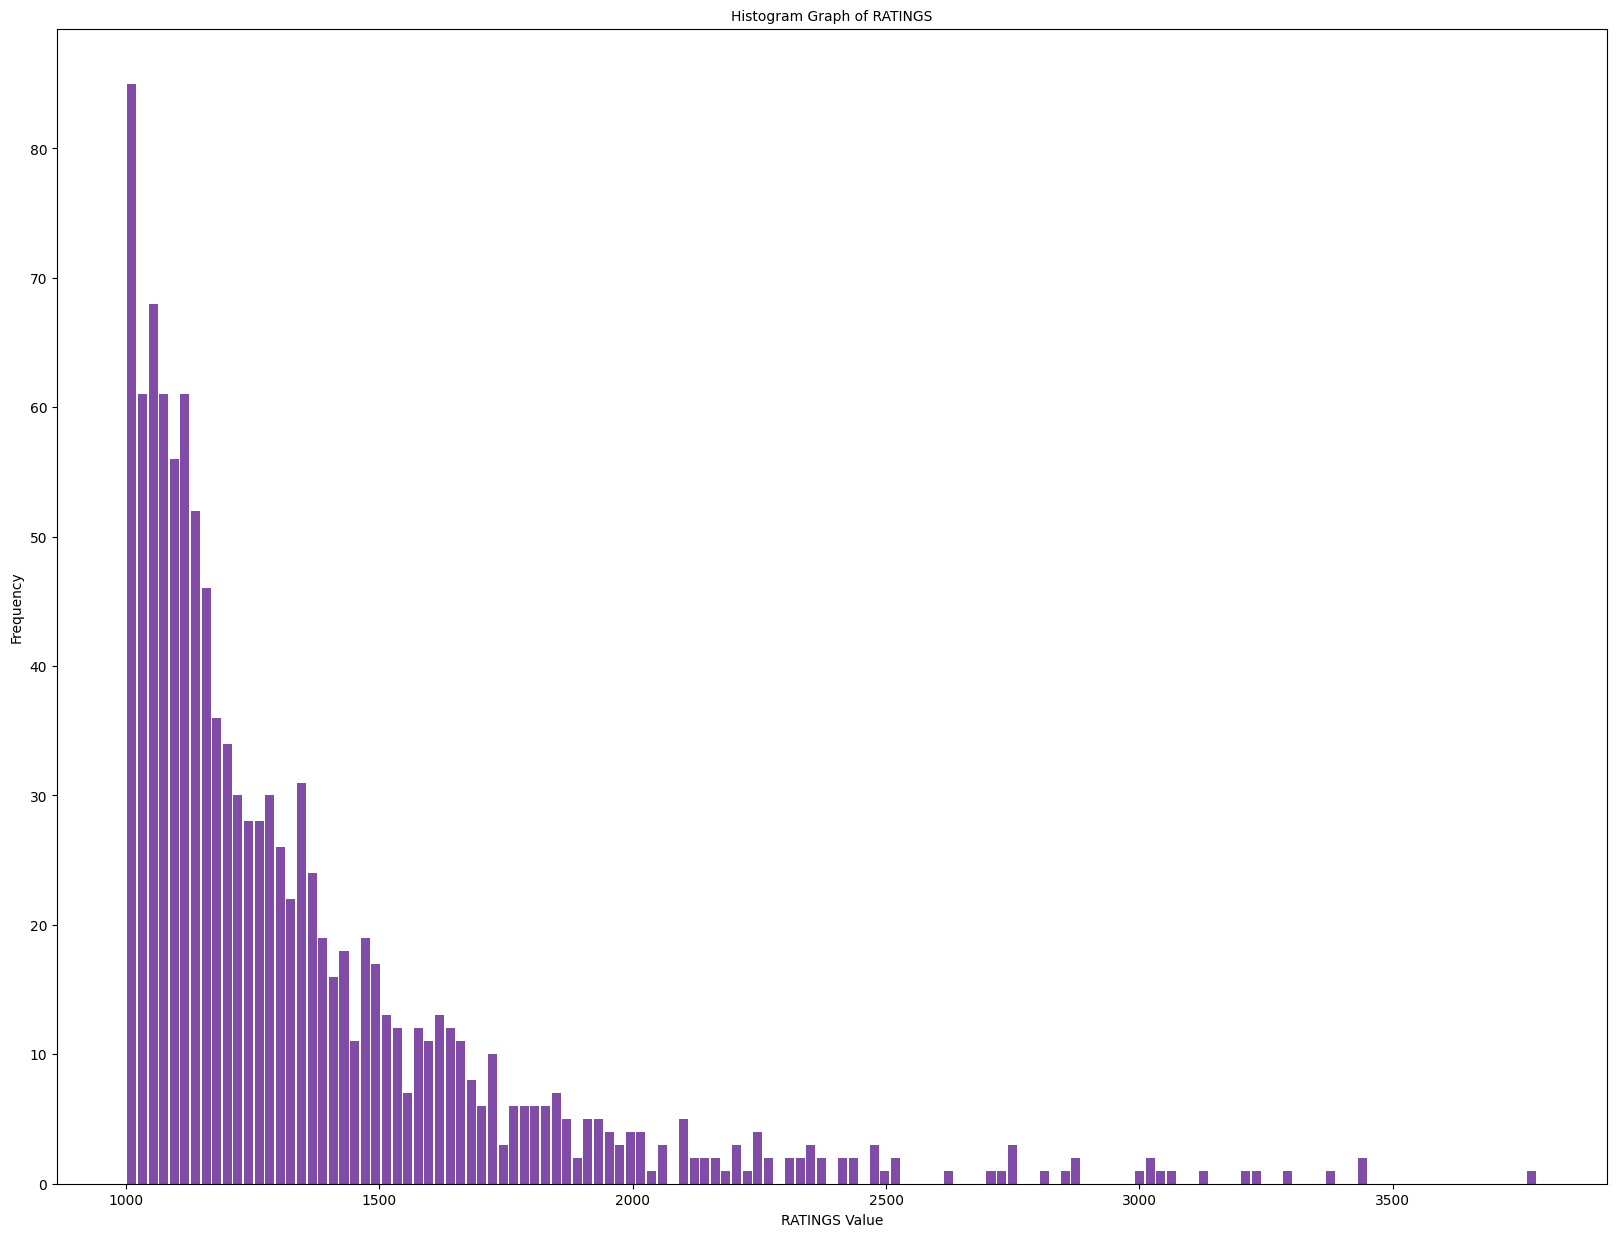

In [ ]:
data = list(usernames_with_ratingCounts.values())
col = 'ratings'
plt.figure(figsize=(20, 15))
plt.hist(data, bins=hist_optimize_bins(data), alpha=0.7, rwidth=0.85, color='indigo')
plt.xticks(rotation=0)
plt.title('Histogram Graph of '+col.upper(),fontsize=10)
plt.xlabel(col.upper()+' Value',fontsize=10)
plt.ylabel('Frequency',fontsize=10)

In [ ]:
usernames_in_rating_dataset = dict(filter(lambda elem: 1000 < elem[1] <= max_rating_count, usernames_with_ratingCounts.items()))

In [ ]:
len(usernames_in_rating_dataset)

1128

In [ ]:
rating_df = rating_df[rating_df.user_id.isin(usernames_in_rating_dataset.keys())]

In [ ]:
rating_df.shape

(1518226, 3)

In [ ]:
rating_df.head(10)

,user_id,anime_id,my_score
0,2485327,59,6
1,2485327,74,7
2,2485327,120,8
3,2485327,178,5
4,2485327,210,7
5,2485327,232,9
6,2485327,249,7
7,2485327,269,8
8,2485327,853,9
9,2485327,857,7


Identifying users in the Rating Dataset

In [ ]:
usernames_in_rating = list(usernames_with_ratingCounts.keys())

In [ ]:
usernames_in_rating[0:3]

[221755, 3007063, 123582]

Identifying animes in the Rating Dataset

In [ ]:
animes_with_ratingCounts = dict(rating_df['anime_id'].value_counts())

In [ ]:
animes_in_rating = list(animes_with_ratingCounts.keys())

In [ ]:
animes_in_rating[0:3]

[6547, 11757, 4224]

User Dataset Preprocessing

In [ ]:
user_df = pd.read_csv('/content/drive/MyDrive/Cloud_Computing/preprocessed_data/user.csv',
                      usecols=['username', 'user_id', 'gender', 'location', 'age'])

In [ ]:
user_df.shape

(106401, 5)

In [ ]:
user_df.head(10)

,username,user_id,gender,location,age
0,karthiga,2255153,Female,"Chennai, India",32
1,Damonashu,37326,Male,"Detroit,Michigan",31
2,bskai,228342,Male,"Nayarit, Mexico",32
3,terune_uzumaki,327311,Female,"Malaysia, Kuantan",24
4,Bas_G,5015094,Male,"Nijmegen, Nederland",23
5,HimeAria,3129315,Female,Poland,26
6,Skallington,326733,Male,Norberg Sweden,31
7,Slimak,61677,Male,Poland,34
8,Elysiun,5927342,Male,Nebraska,38
9,jimothy000,47167,Male,"England,Manchester",27


In [ ]:
#def birth_date_to_age(birth_date):
#    return 2022 - int(birth_date.split(' ')[0].split('-')[0])

In [ ]:
#user_df['birth_date'] = user_df["birth_date"].apply(birth_date_to_age)

In [ ]:
#user_df = user_df.rename(columns={'birth_date': 'age'})

Dropping users not in the preprocessed rating dataset

In [ ]:
#user_df = user_df[user_df.username.isin(usernames_in_rating)]

In [ ]:
user_df.shape

(106401, 5)

In [ ]:
user_df.head(10)

,username,user_id,gender,location,age
0,karthiga,2255153,Female,"Chennai, India",32
1,Damonashu,37326,Male,"Detroit,Michigan",31
2,bskai,228342,Male,"Nayarit, Mexico",32
3,terune_uzumaki,327311,Female,"Malaysia, Kuantan",24
4,Bas_G,5015094,Male,"Nijmegen, Nederland",23
5,HimeAria,3129315,Female,Poland,26
6,Skallington,326733,Male,Norberg Sweden,31
7,Slimak,61677,Male,Poland,34
8,Elysiun,5927342,Male,Nebraska,38
9,jimothy000,47167,Male,"England,Manchester",27


In [ ]:
#user_df.to_csv('./preprocessed_data/user.csv', encoding='utf-8', index=False)

Converting Usernames to UserIDs in the Ratings Dataset

In [ ]:
user_df.head()

,username,user_id,gender,location,age
0,karthiga,2255153,Female,"Chennai, India",32
1,Damonashu,37326,Male,"Detroit,Michigan",31
2,bskai,228342,Male,"Nayarit, Mexico",32
3,terune_uzumaki,327311,Female,"Malaysia, Kuantan",24
4,Bas_G,5015094,Male,"Nijmegen, Nederland",23


In [ ]:
rating_df.head()

,user_id,anime_id,my_score
0,2485327,59,6
1,2485327,74,7
2,2485327,120,8
3,2485327,178,5
4,2485327,210,7


In [ ]:
# Merging both DataFrames based on user_id
combined_df = pd.merge(user_df, rating_df, on='user_id')

combined_df.head()

,username,user_id,gender,location,age,anime_id,my_score
0,MistButterfly,2485327,Female,~ Hungary ~,30,59,6
1,MistButterfly,2485327,Female,~ Hungary ~,30,74,7
2,MistButterfly,2485327,Female,~ Hungary ~,30,120,8
3,MistButterfly,2485327,Female,~ Hungary ~,30,178,5
4,MistButterfly,2485327,Female,~ Hungary ~,30,210,7


In [ ]:
users_with_IDs = dict(zip(combined_df.username, combined_df.user_id))

In [ ]:
users_with_IDs['Zenit']

28563

In [ ]:
def username_to_userid(username):
    return users_with_IDs[username]

In [ ]:
#rating_df['username'] = rating_df["username"].apply(username_to_userid)

In [ ]:
#rating_df = rating_df.rename(columns={'username': 'user_id'})

In [ ]:
rating_df.head(10)

,user_id,anime_id,my_score
0,2485327,59,6
1,2485327,74,7
2,2485327,120,8
3,2485327,178,5
4,2485327,210,7
5,2485327,232,9
6,2485327,249,7
7,2485327,269,8
8,2485327,853,9
9,2485327,857,7


In [ ]:
rating_df.to_csv('./preprocessed_data/rating.csv', encoding='utf-8', index=False)

Anime List Dataset Preprocessing

In [ ]:
anime_df = pd.read_csv('./data/AnimeList_cleaned.csv', usecols=['anime_id','title', 'image_url', 'genre', 'aired_from_year'])

In [ ]:
anime_df["genre"] = anime_df["genre"].fillna('NULL')

In [ ]:
anime_df.shape

(6668, 5)

In [ ]:
anime_df.head(10)

,anime_id,title,image_url,genre,aired_from_year
0,11013,Inu x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Supernatural, Romance, Shounen",2012.0
1,2104,Seto no Hanayome,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Parody, Romance, School, Shounen",2007.0
2,5262,Shugo Chara!! Doki,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Magic, School, Shoujo",2008.0
3,721,Princess Tutu,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Drama, Magic, Romance, Fantasy",2002.0
4,12365,Bakuman. 3rd Season,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Drama, Romance, Shounen",2012.0
5,6586,Yume-iro Pâtissière,https://myanimelist.cdn-dena.com/images/anime/...,"Kids, School, Shoujo",2009.0
6,178,Ultra Maniac,https://myanimelist.cdn-dena.com/images/anime/...,"Magic, Comedy, Romance, School, Shoujo",2003.0
7,2787,Shakugan no Shana II (Second),https://myanimelist.cdn-dena.com/images/anime/...,"Action, Drama, Fantasy, Romance, School, Super...",2007.0
8,4477,Nodame Cantabile: Paris-hen,https://myanimelist.cdn-dena.com/images/anime/...,"Music, Slice of Life, Comedy, Romance, Josei",2008.0
9,853,Ouran Koukou Host Club,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Harem, Romance, School, Shoujo",2006.0


Dropping animes not in the preprocessed rating dataset

In [ ]:
anime_df = anime_df[anime_df.anime_id.isin(animes_in_rating)]

In [ ]:
anime_df.shape

(6562, 5)

In [ ]:
anime_df.head(10)

,anime_id,title,image_url,genre,aired_from_year
0,11013,Inu x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Supernatural, Romance, Shounen",2012.0
1,2104,Seto no Hanayome,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Parody, Romance, School, Shounen",2007.0
2,5262,Shugo Chara!! Doki,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Magic, School, Shoujo",2008.0
3,721,Princess Tutu,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Drama, Magic, Romance, Fantasy",2002.0
4,12365,Bakuman. 3rd Season,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Drama, Romance, Shounen",2012.0
5,6586,Yume-iro Pâtissière,https://myanimelist.cdn-dena.com/images/anime/...,"Kids, School, Shoujo",2009.0
6,178,Ultra Maniac,https://myanimelist.cdn-dena.com/images/anime/...,"Magic, Comedy, Romance, School, Shoujo",2003.0
7,2787,Shakugan no Shana II (Second),https://myanimelist.cdn-dena.com/images/anime/...,"Action, Drama, Fantasy, Romance, School, Super...",2007.0
8,4477,Nodame Cantabile: Paris-hen,https://myanimelist.cdn-dena.com/images/anime/...,"Music, Slice of Life, Comedy, Romance, Josei",2008.0
9,853,Ouran Koukou Host Club,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Harem, Romance, School, Shoujo",2006.0


In [ ]:
anime_genre= anime_df["genre"].str.split(', ').tolist()
anime_genre[0:3]

[['Comedy', 'Supernatural', 'Romance', 'Shounen'],
 ['Comedy', 'Parody', 'Romance', 'School', 'Shounen'],
 ['Comedy', 'Magic', 'School', 'Shoujo']]

In [ ]:
import itertools
# list, 2D to 1D
genre_all_rows_values = list(itertools.chain.from_iterable(anime_genre))

In [ ]:
len(genre_all_rows_values)

23525

In [ ]:
genres = list(set(genre_all_rows_values))
len(genres)

44

In [ ]:
genres[0:3]

['Vampire', 'Supernatural', 'Parody']

In [ ]:
anime_df = anime_df.reindex(anime_df.columns.tolist() + genres, axis=1, fill_value=0)
anime_df.info()
for index, row in anime_df.iterrows():
    for val in row.genre.split(', '):
        if val != 'NA':
            anime_df.loc[index, val] = 1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6562 entries, 0 to 6658
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         6562 non-null   int64  
 1   title            6562 non-null   object 
 2   image_url        6561 non-null   object 
 3   genre            6562 non-null   object 
 4   aired_from_year  6562 non-null   float64
 5   Vampire          6562 non-null   int64  
 6   Supernatural     6562 non-null   int64  
 7   Parody           6562 non-null   int64  
 8   Mystery          6562 non-null   int64  
 9   Game             6562 non-null   int64  
 10  Shounen Ai       6562 non-null   int64  
 11  Action           6562 non-null   int64  
 12  Dementia         6562 non-null   int64  
 13  Shounen          6562 non-null   int64  
 14  Harem            6562 non-null   int64  
 15  Shoujo           6562 non-null   int64  
 16  Seinen           6562 non-null   int64  
 17  Yaoi          

In [ ]:
anime_df.head(10)

,anime_id,title,image_url,genre,aired_from_year,Vampire,Supernatural,Parody,Mystery,Game,...,Slice of Life,Police,Mecha,Magic,Super Power,Demons,Josei,Kids,Romance,Psychological
0,11013,Inu x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Supernatural, Romance, Shounen",2012.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2104,Seto no Hanayome,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Parody, Romance, School, Shounen",2007.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,5262,Shugo Chara!! Doki,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Magic, School, Shoujo",2008.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,721,Princess Tutu,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Drama, Magic, Romance, Fantasy",2002.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,12365,Bakuman. 3rd Season,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Drama, Romance, Shounen",2012.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,6586,Yume-iro Pâtissière,https://myanimelist.cdn-dena.com/images/anime/...,"Kids, School, Shoujo",2009.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,178,Ultra Maniac,https://myanimelist.cdn-dena.com/images/anime/...,"Magic, Comedy, Romance, School, Shoujo",2003.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,2787,Shakugan no Shana II (Second),https://myanimelist.cdn-dena.com/images/anime/...,"Action, Drama, Fantasy, Romance, School, Super...",2007.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,4477,Nodame Cantabile: Paris-hen,https://myanimelist.cdn-dena.com/images/anime/...,"Music, Slice of Life, Comedy, Romance, Josei",2008.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
9,853,Ouran Koukou Host Club,https://myanimelist.cdn-dena.com/images/anime/...,"Comedy, Harem, Romance, School, Shoujo",2006.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
anime_df.shape

(6562, 49)

In [ ]:
anime_df.to_csv('./preprocessed_data/anime.csv', encoding='utf-8', index=False)

User Dataset Visualization

Text(0, 0.5, 'Frequency')

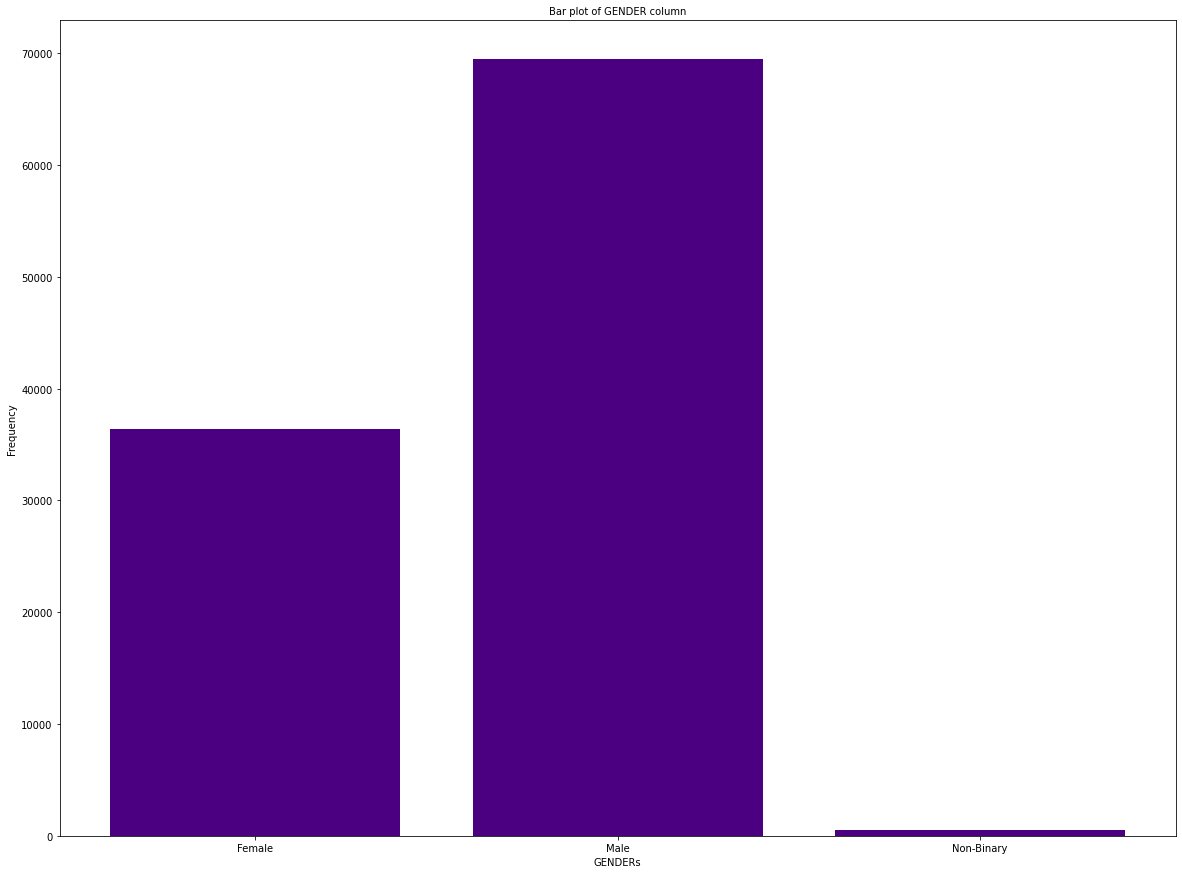

In [ ]:
data = user_df["gender"]
gender_names, gender_counts = np.unique(data, return_counts=True)
col = 'gender'
plt.figure(figsize=(20, 15))
plt.bar(gender_names, gender_counts, color='indigo')
plt.xticks(rotation=0)
plt.title(f'Bar plot of {col.upper()} column',fontsize=10)
plt.xlabel(f'{col.upper()}s',fontsize=10)
plt.ylabel('Frequency',fontsize=10)

Text(0, 0.5, 'Frequency')

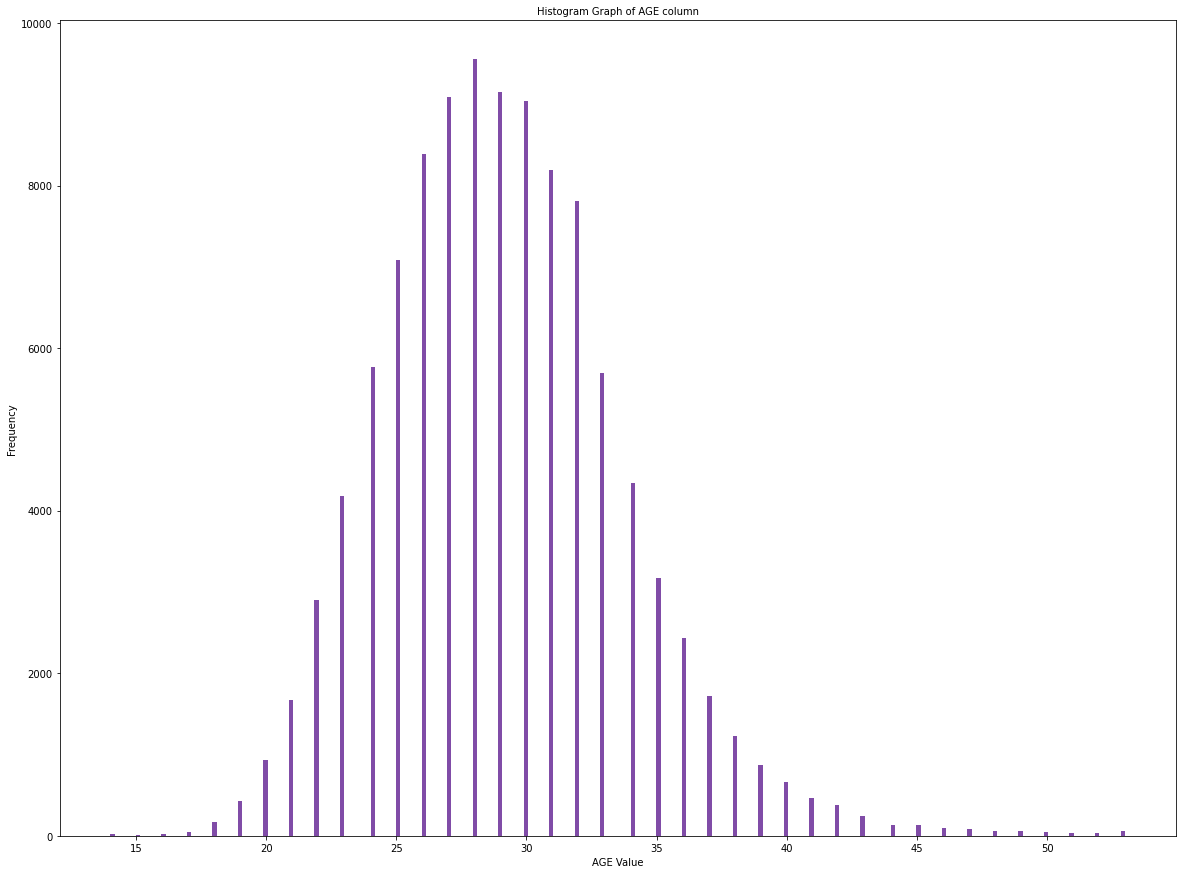

In [ ]:
data = user_df['age']
col = 'age'
plt.figure(figsize=(20, 15))
plt.hist(data, bins=hist_optimize_bins(data), alpha=0.7, rwidth=0.85, color='indigo')
plt.xticks(rotation=0)
plt.title('Histogram Graph of '+col.upper()+' column',fontsize=10)
plt.xlabel(col.upper()+' Value',fontsize=10)
plt.ylabel('Frequency',fontsize=10)

Anime Dataset Visualization

Text(0, 0.5, 'Frequency')

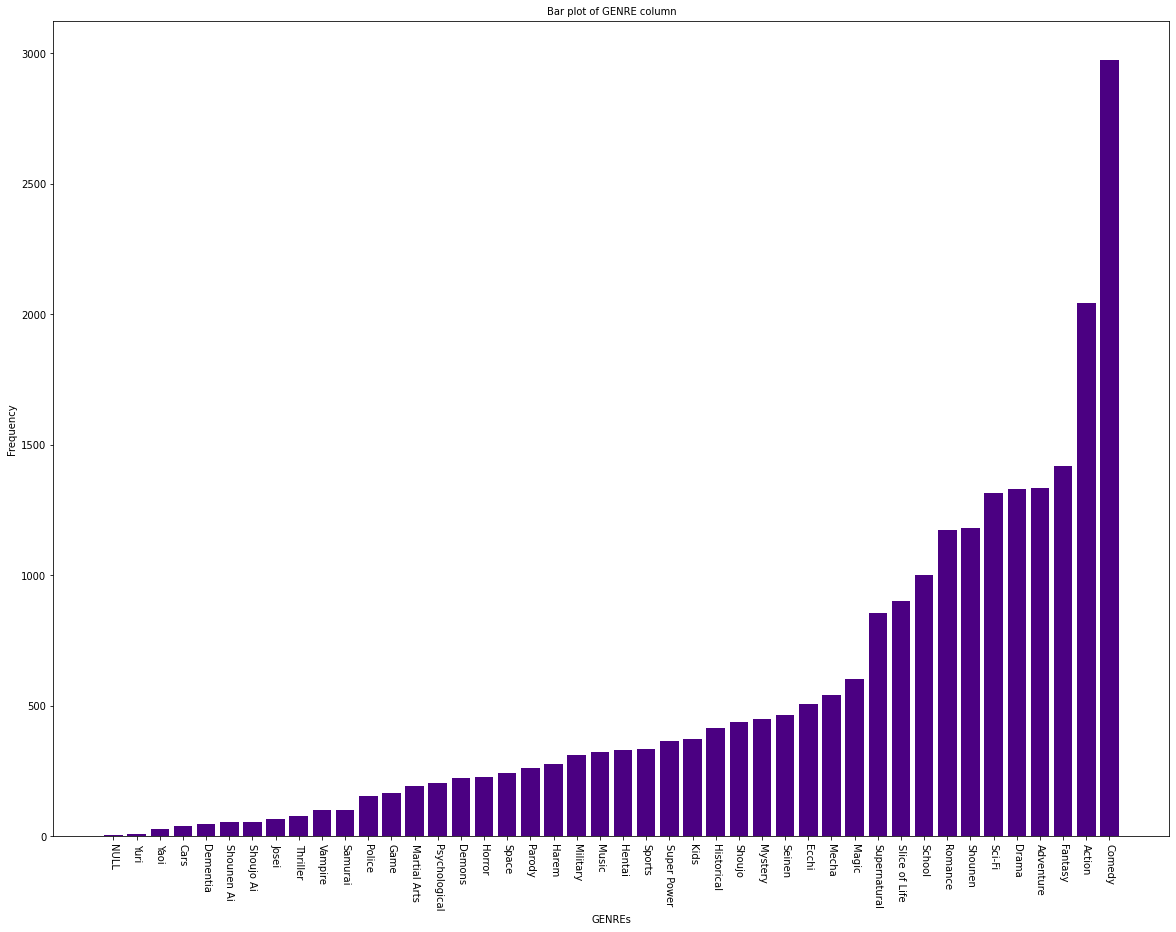

In [ ]:
data = []
for genre in genres:
    data.append(anime_df[genre].sum())
data = dict(zip(genres, data))
data = dict(sorted(data.items(), key=lambda item:item[1]))
col = 'genre'
plt.figure(figsize=(20, 15))
plt.bar(data.keys(), data.values(), color='indigo')
plt.xticks(rotation=-90)
plt.title(f'Bar plot of {col.upper()} column',fontsize=10)
plt.xlabel(f'{col.upper()}s',fontsize=10)
plt.ylabel('Frequency',fontsize=10)

Text(0, 0.5, 'Frequency')

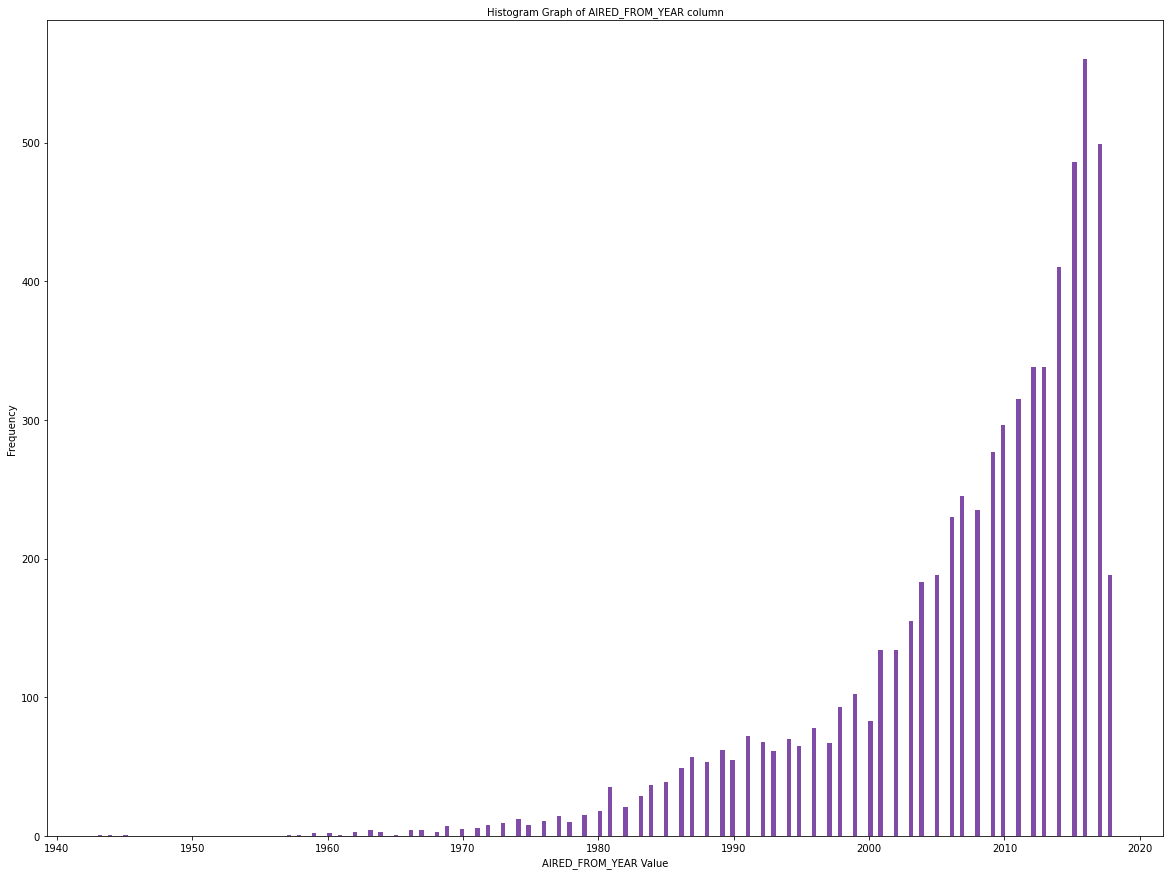

In [ ]:
data = anime_df['aired_from_year']
col = 'aired_from_year'
plt.figure(figsize=(20, 15))
plt.hist(data, bins=hist_optimize_bins(data), alpha=0.7, rwidth=0.85, color='indigo')
plt.xticks(rotation=0)
plt.title('Histogram Graph of '+col.upper()+' column',fontsize=10)
plt.xlabel(col.upper()+' Value',fontsize=10)
plt.ylabel('Frequency',fontsize=10)

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz
!tar xf spark-3.2.0-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" #"/usr/lib/jvm/java-11-openjdk-amd64" #
os.environ["SPARK_HOME"] = "spark-3.2.0-bin-hadoop3.2"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


----------------------------------------- Recommendation Engine -----------------------------------------

In [ ]:
%config IPCompleter.greedy=True
import findspark
findspark.init()

from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SparkSession

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pyspark.mllib.recommendation import ALS
from pyspark.mllib.recommendation import Rating

In [ ]:
conf = SparkConf().set("spark.ui.port", "4050") \
                  .setAppName('Recommendation System with Spark') \
                  .setMaster('local')
sc = SparkContext(conf=conf)
#SparkContext.getOrCreate(conf=conf)
spark = SparkSession.builder \
    .config(conf=conf) \
    .getOrCreate()

In [ ]:
rating = sc.textFile("/content/drive/MyDrive/Cloud_Computing/preprocessed_data/rating.csv")
header = rating.first() #extract header
rating = rating.filter(lambda row: row != header)   #filter out header
rating.take(3)

['2485327,59,6', '2485327,74,7', '2485327,120,8']

In [ ]:
trainingRatings, testRatings = rating.randomSplit([0.7, 0.3])

In [ ]:
trainingData = trainingRatings.map(lambda l: l.split(',')).map(lambda l: Rating(int(l[0]), int(l[1]), float(l[2])))
trainingData.take(3)

[Rating(user=2485327, product=59, rating=6.0),
 Rating(user=2485327, product=74, rating=7.0),
 Rating(user=2485327, product=178, rating=5.0)]

In [ ]:
testData = testRatings.map(lambda l: l.split(',')).map(lambda l: (int(l[0]), int(l[1])))
testData.take(3)

[(2485327, 120), (2485327, 269), (2485327, 1557)]

In [ ]:
def calc_mse(test_rating, predict_rating):
    sum=0
    n=len(predict_rating)
    for i in range(0,n):
        difference = test_rating[i]-predict_rating[i]
        squared_difference = difference**2
        sum = sum +squared_difference
    MSE =sum/n
    print("The Mean Square Error is: ", MSE)

In [ ]:
def plot_performance_evaluation_of_model(test_ratings, predict_ratings):
    bars1 = test_ratings[0:5]
    bars2 = predict_ratings[0:5]

    barWidth = 0.3

    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]

    plt.figure(figsize=(20,15))
    plt.bar(r1, bars1, width = barWidth, color = 'indigo', edgecolor = 'black', capsize=7, label='Rating')
    plt.bar(r2, bars2, width = barWidth, color = 'teal', edgecolor = 'black', capsize=7, label='Prediction')

    plt.xticks([r + barWidth for r in range(len(bars1))], ['Prediction_1', 'Prediction_2', 'Prediction_3', 'Prediction_4', 'Prediction_5'])
    plt.ylabel('Rating')
    plt.legend()

    plt.show()

The Mean Square Error is:  4.81510140103733


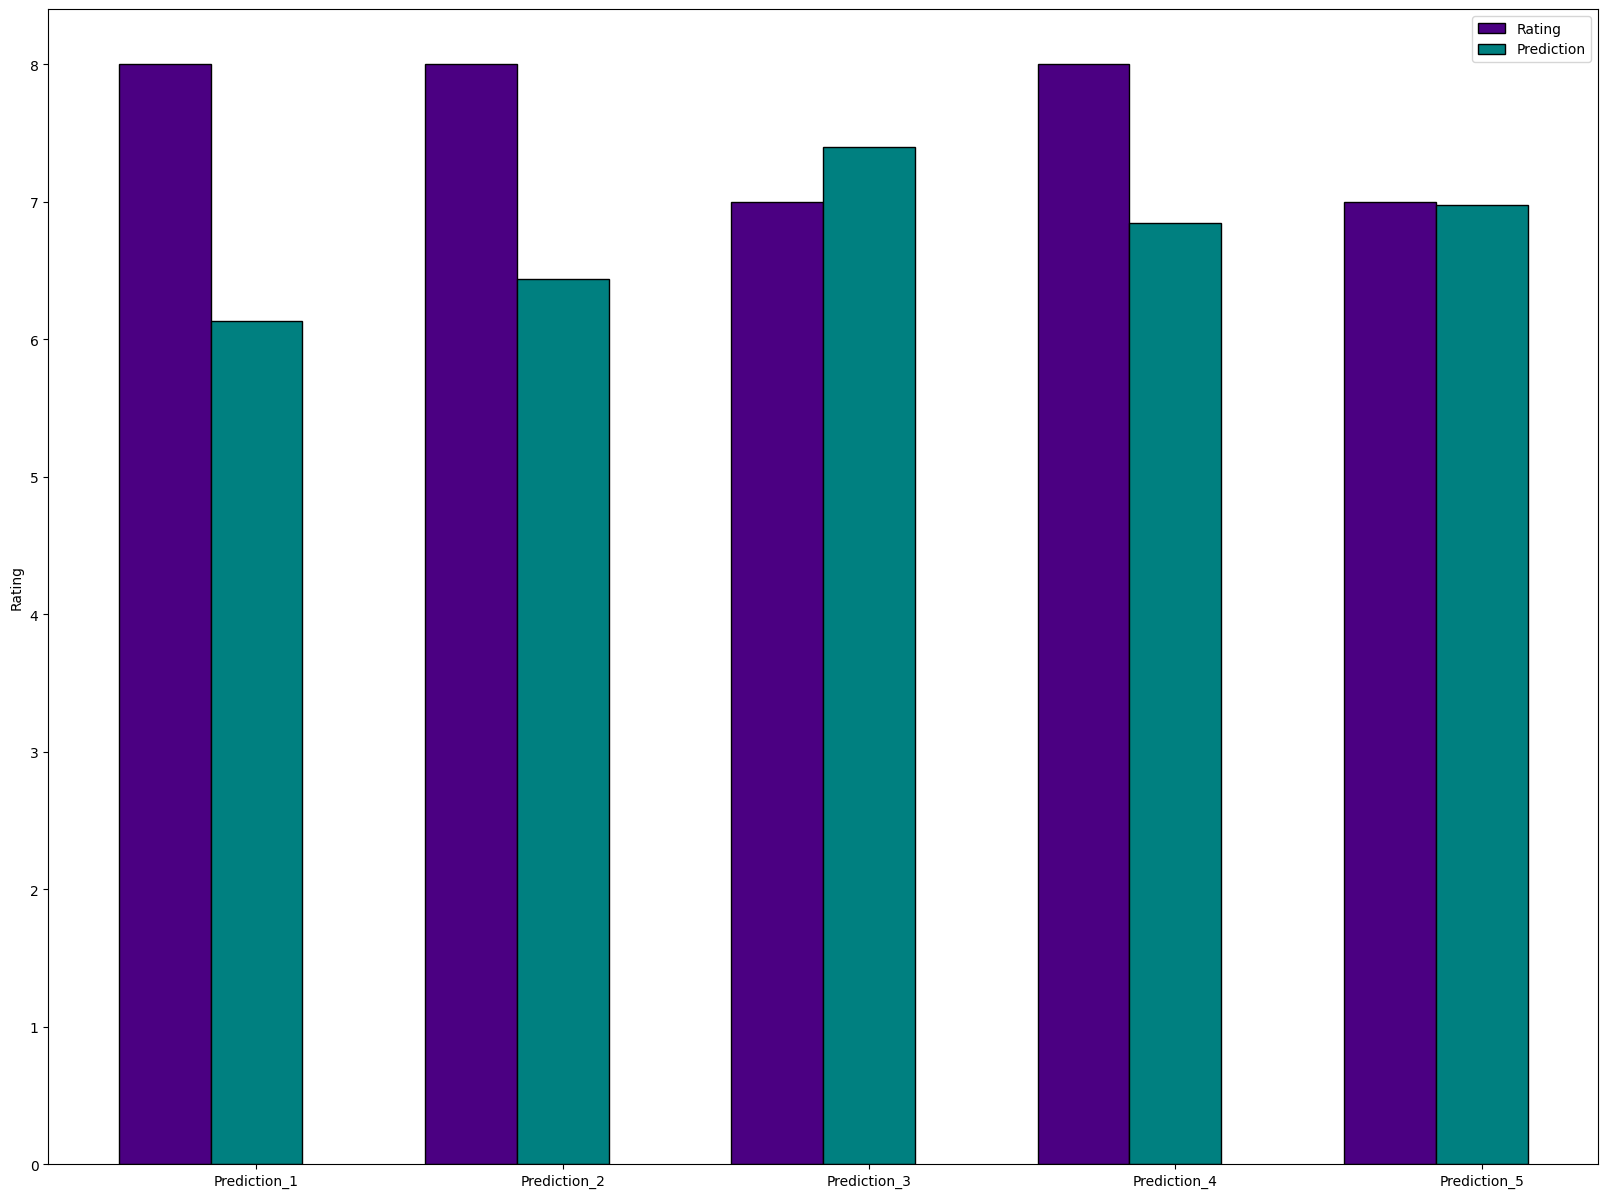

In [ ]:
rank, iter, lambda_ = 10, 10, 0.1
model = ALS.train(trainingData, rank=rank, iterations=iter, lambda_=lambda_, seed=5047)
predictions = model.predictAll(testData)
allPredictRatings=predictions.map(lambda l: float(l[2]))
arr_allPredictRatings=allPredictRatings.collect()
allTestRatings = testRatings.map(lambda l: l.split(',')).map(lambda l: (float(l[2])))
arr_allTestRatings=allTestRatings.collect()
calc_mse(arr_allTestRatings, arr_allPredictRatings)
plot_performance_evaluation_of_model(arr_allTestRatings, arr_allPredictRatings)

The Mean Square Error is:  5.186412514158233


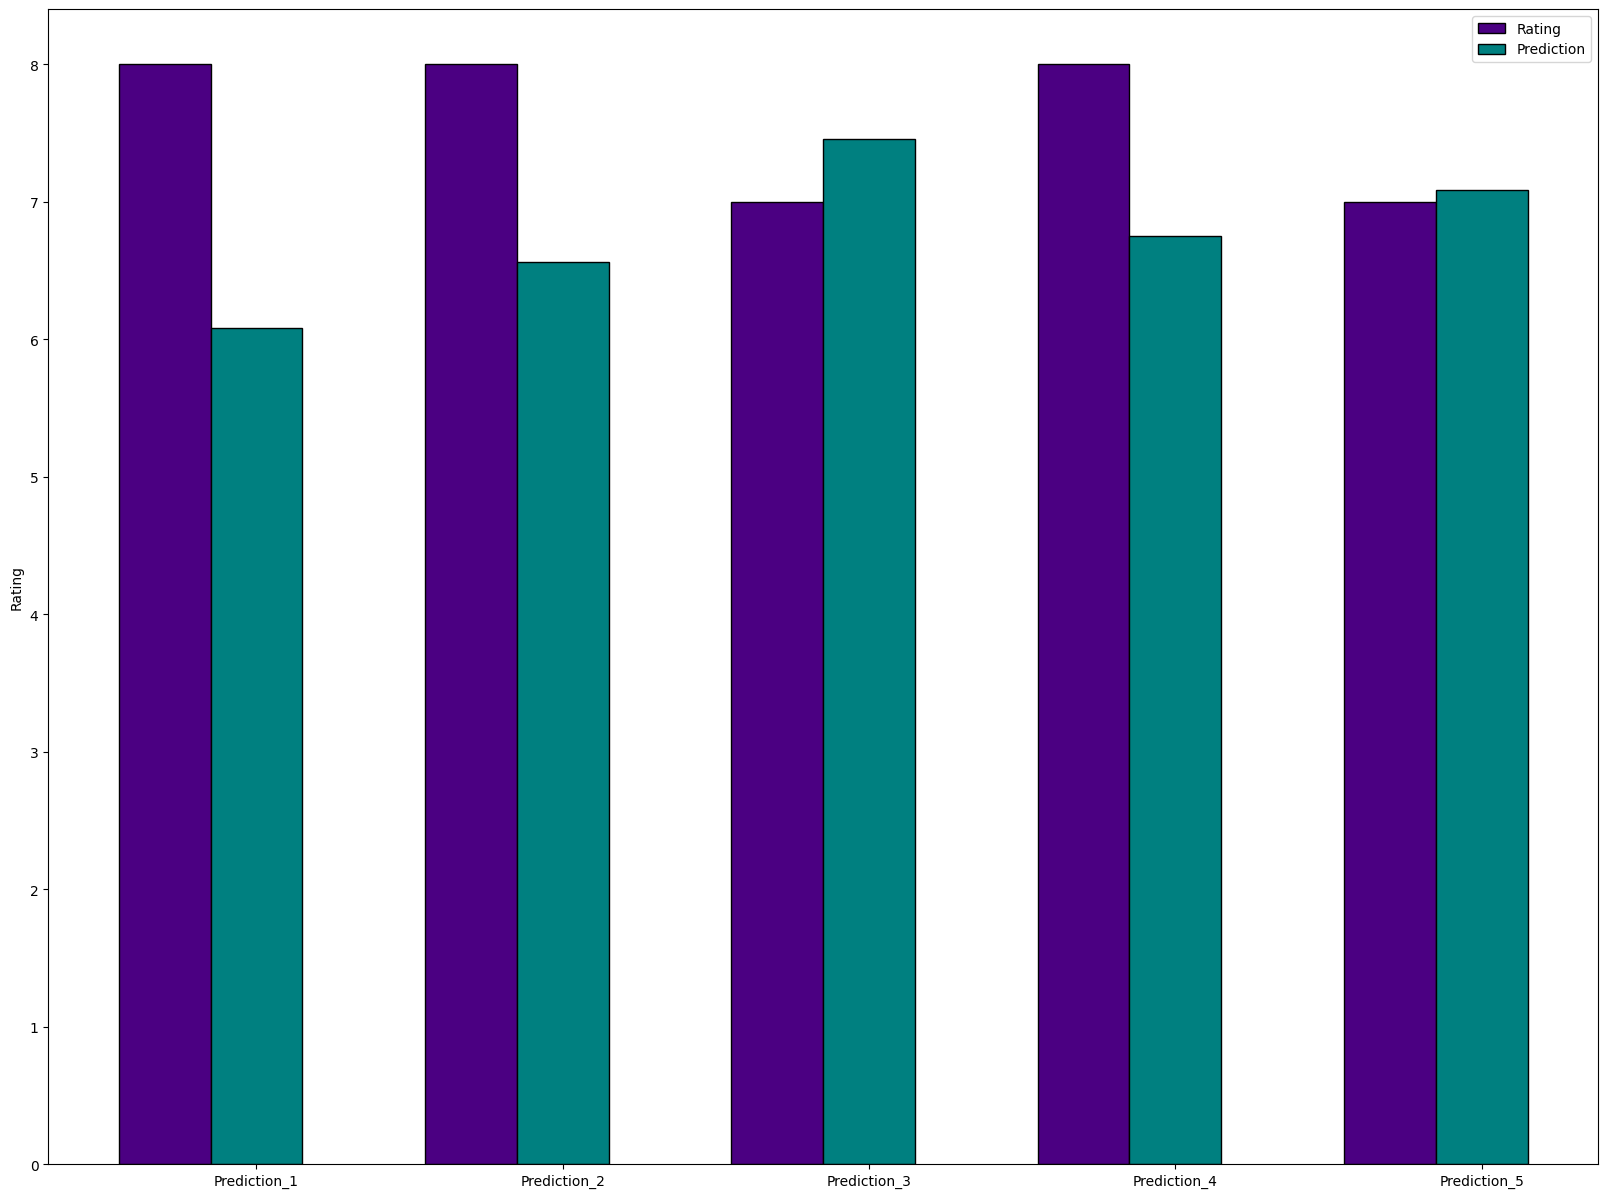

In [ ]:
rank, iter, lambda_ = 10, 10, 0.01
model = ALS.train(trainingData, rank=rank, iterations=iter, lambda_=lambda_, seed=5047)
predictions = model.predictAll(testData)
allPredictRatings=predictions.map(lambda l: float(l[2]))
arr_allPredictRatings=allPredictRatings.collect()
allTestRatings = testRatings.map(lambda l: l.split(',')).map(lambda l: (float(l[2])))
arr_allTestRatings=allTestRatings.collect()
calc_mse(arr_allTestRatings, arr_allPredictRatings)
plot_performance_evaluation_of_model(arr_allTestRatings, arr_allPredictRatings)

The Mean Square Error is:  4.814108844464915


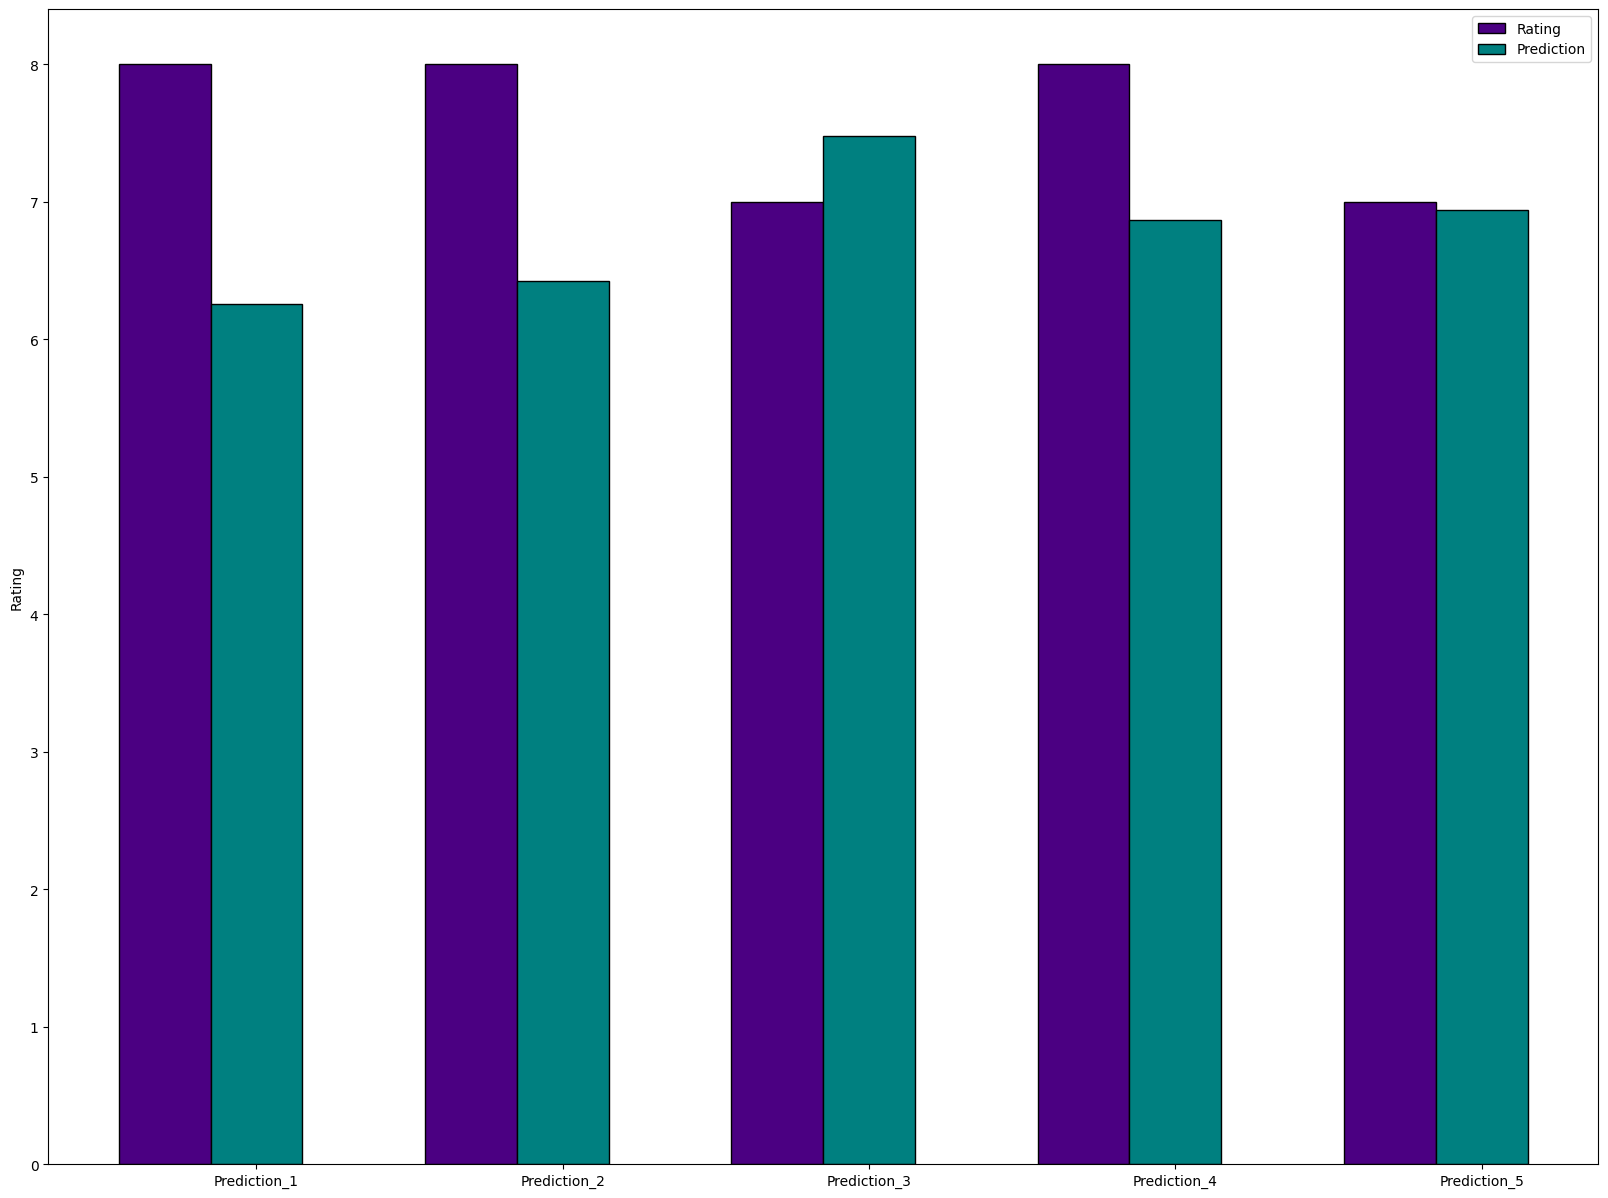

In [ ]:
rank, iter, lambda_ = 50, 10, 0.1
model = ALS.train(trainingData, rank=rank, iterations=iter, lambda_=lambda_, seed=5047)
predictions = model.predictAll(testData)
allPredictRatings=predictions.map(lambda l: float(l[2]))
arr_allPredictRatings=allPredictRatings.collect()
allTestRatings = testRatings.map(lambda l: l.split(',')).map(lambda l: (float(l[2])))
arr_allTestRatings=allTestRatings.collect()
calc_mse(arr_allTestRatings, arr_allPredictRatings)
plot_performance_evaluation_of_model(arr_allTestRatings, arr_allPredictRatings)

The Mean Square Error is:  5.768323743853855


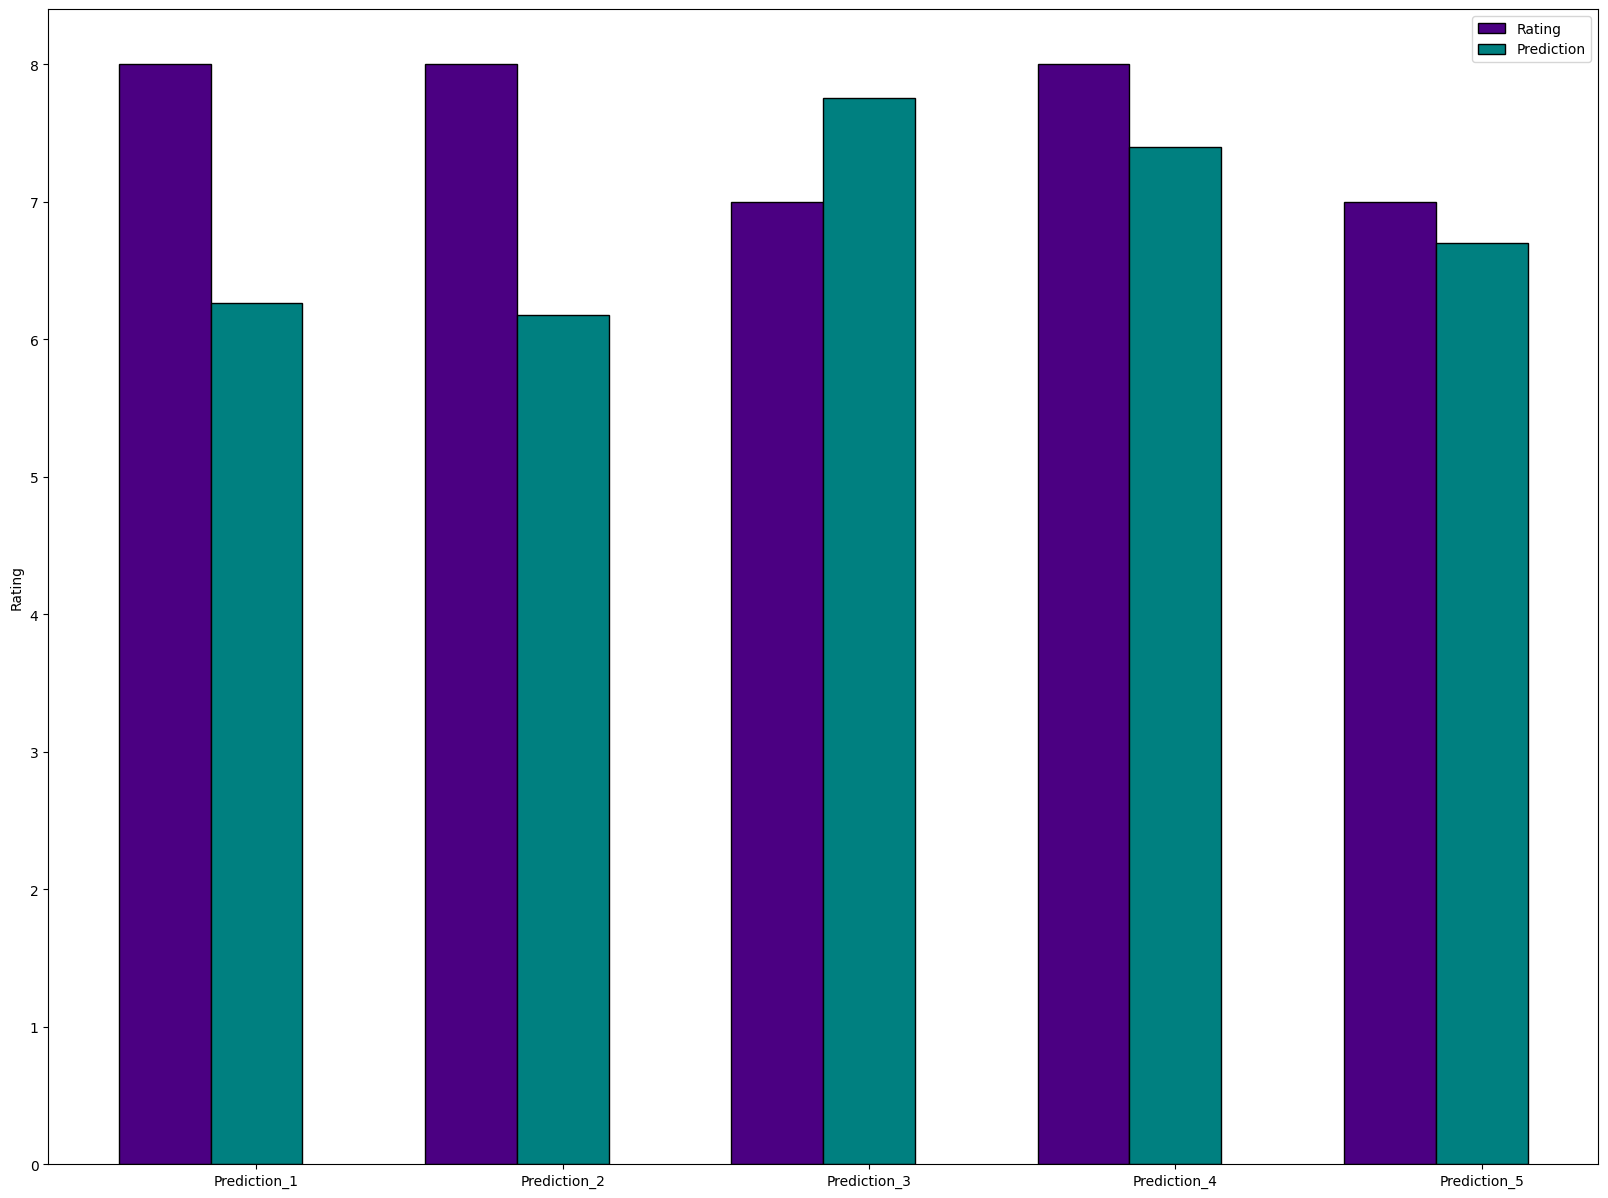

In [ ]:
rank, iter, lambda_ = 50, 10, 0.01
model = ALS.train(trainingData, rank=rank, iterations=iter, lambda_=lambda_, seed=5047)
predictions = model.predictAll(testData)
allPredictRatings=predictions.map(lambda l: float(l[2]))
arr_allPredictRatings=allPredictRatings.collect()
allTestRatings = testRatings.map(lambda l: l.split(',')).map(lambda l: (float(l[2])))
arr_allTestRatings=allTestRatings.collect()
calc_mse(arr_allTestRatings, arr_allPredictRatings)
plot_performance_evaluation_of_model(arr_allTestRatings, arr_allPredictRatings)

The Mean Square Error is:  4.8246808847753755


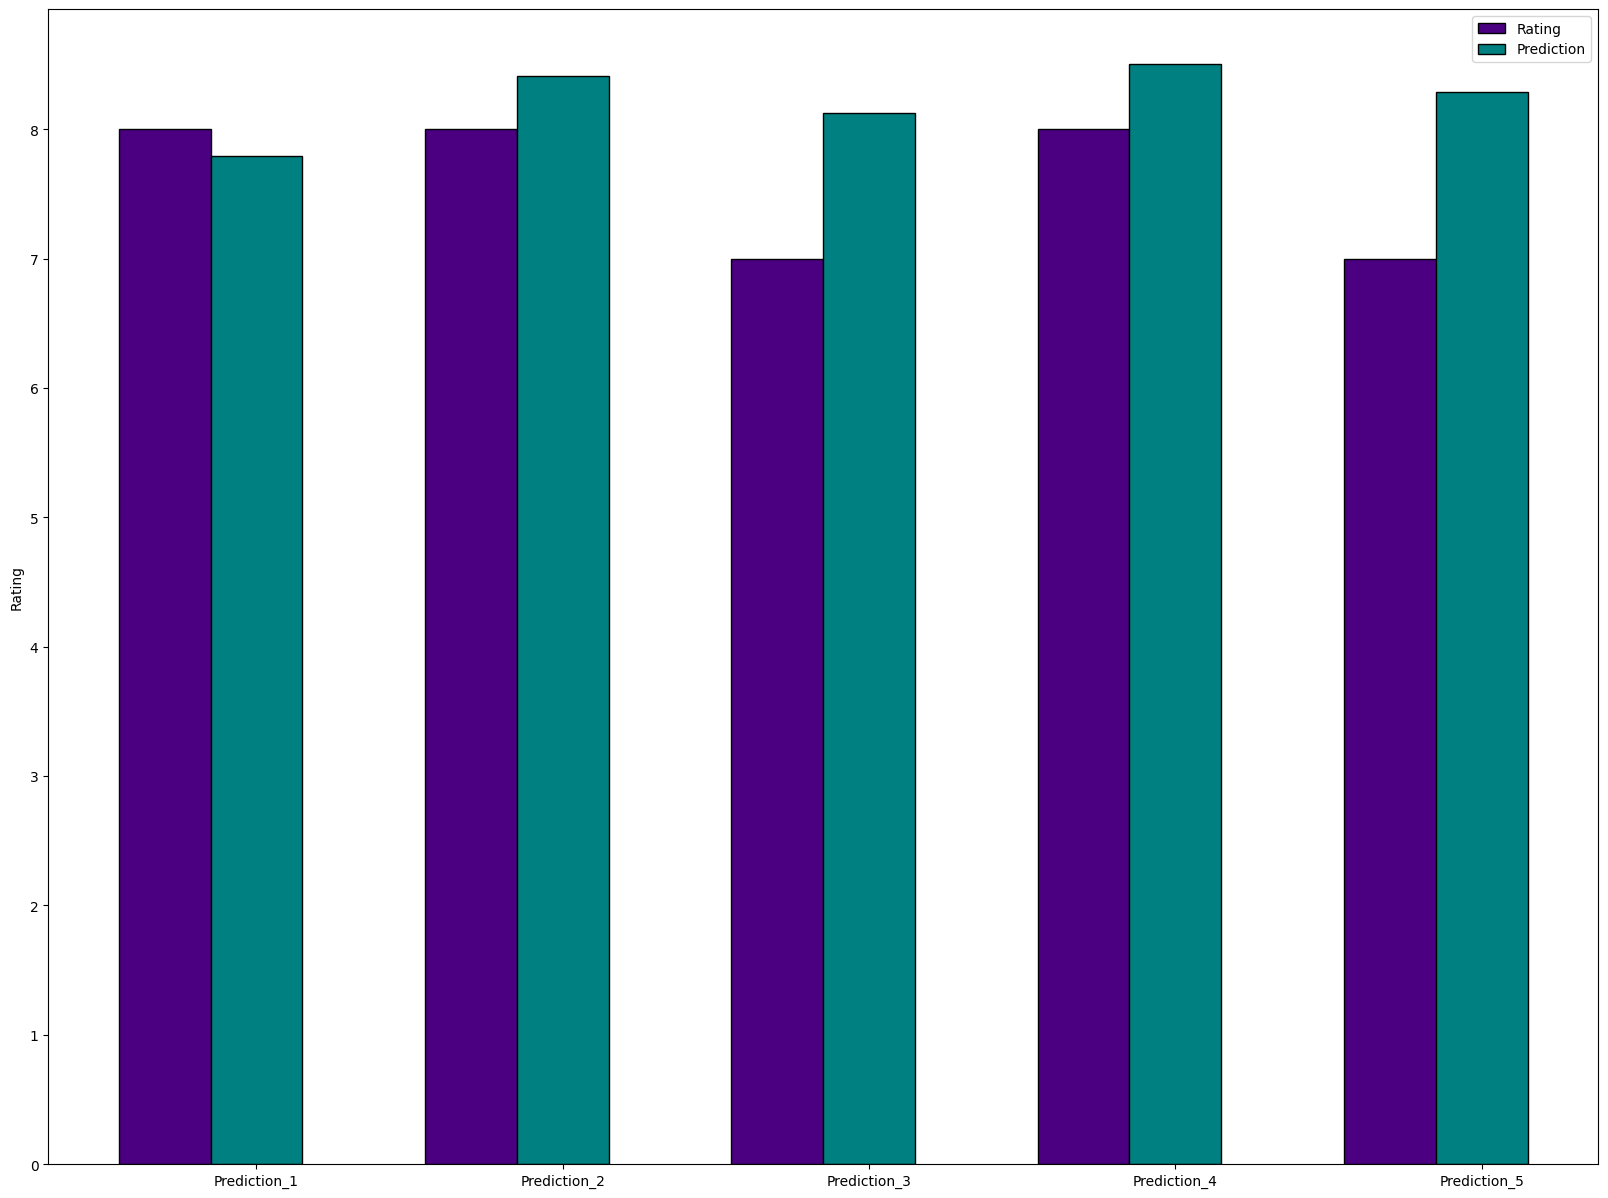

In [ ]:
rank, iter, lambda_ = 200, 10, 0.1
model = ALS.train(trainingData, rank=rank, iterations=iter, lambda_=lambda_, seed=5047)
predictions = model.predictAll(testData)
allPredictRatings=predictions.map(lambda l: float(l[2]))
arr_allPredictRatings=allPredictRatings.collect()
allTestRatings = testRatings.map(lambda l: l.split(',')).map(lambda l: (float(l[2])))
arr_allTestRatings=allTestRatings.collect()
calc_mse(arr_allTestRatings, arr_allPredictRatings)
plot_performance_evaluation_of_model(arr_allTestRatings, arr_allPredictRatings)

The Mean Square Error is:  6.336711568916326


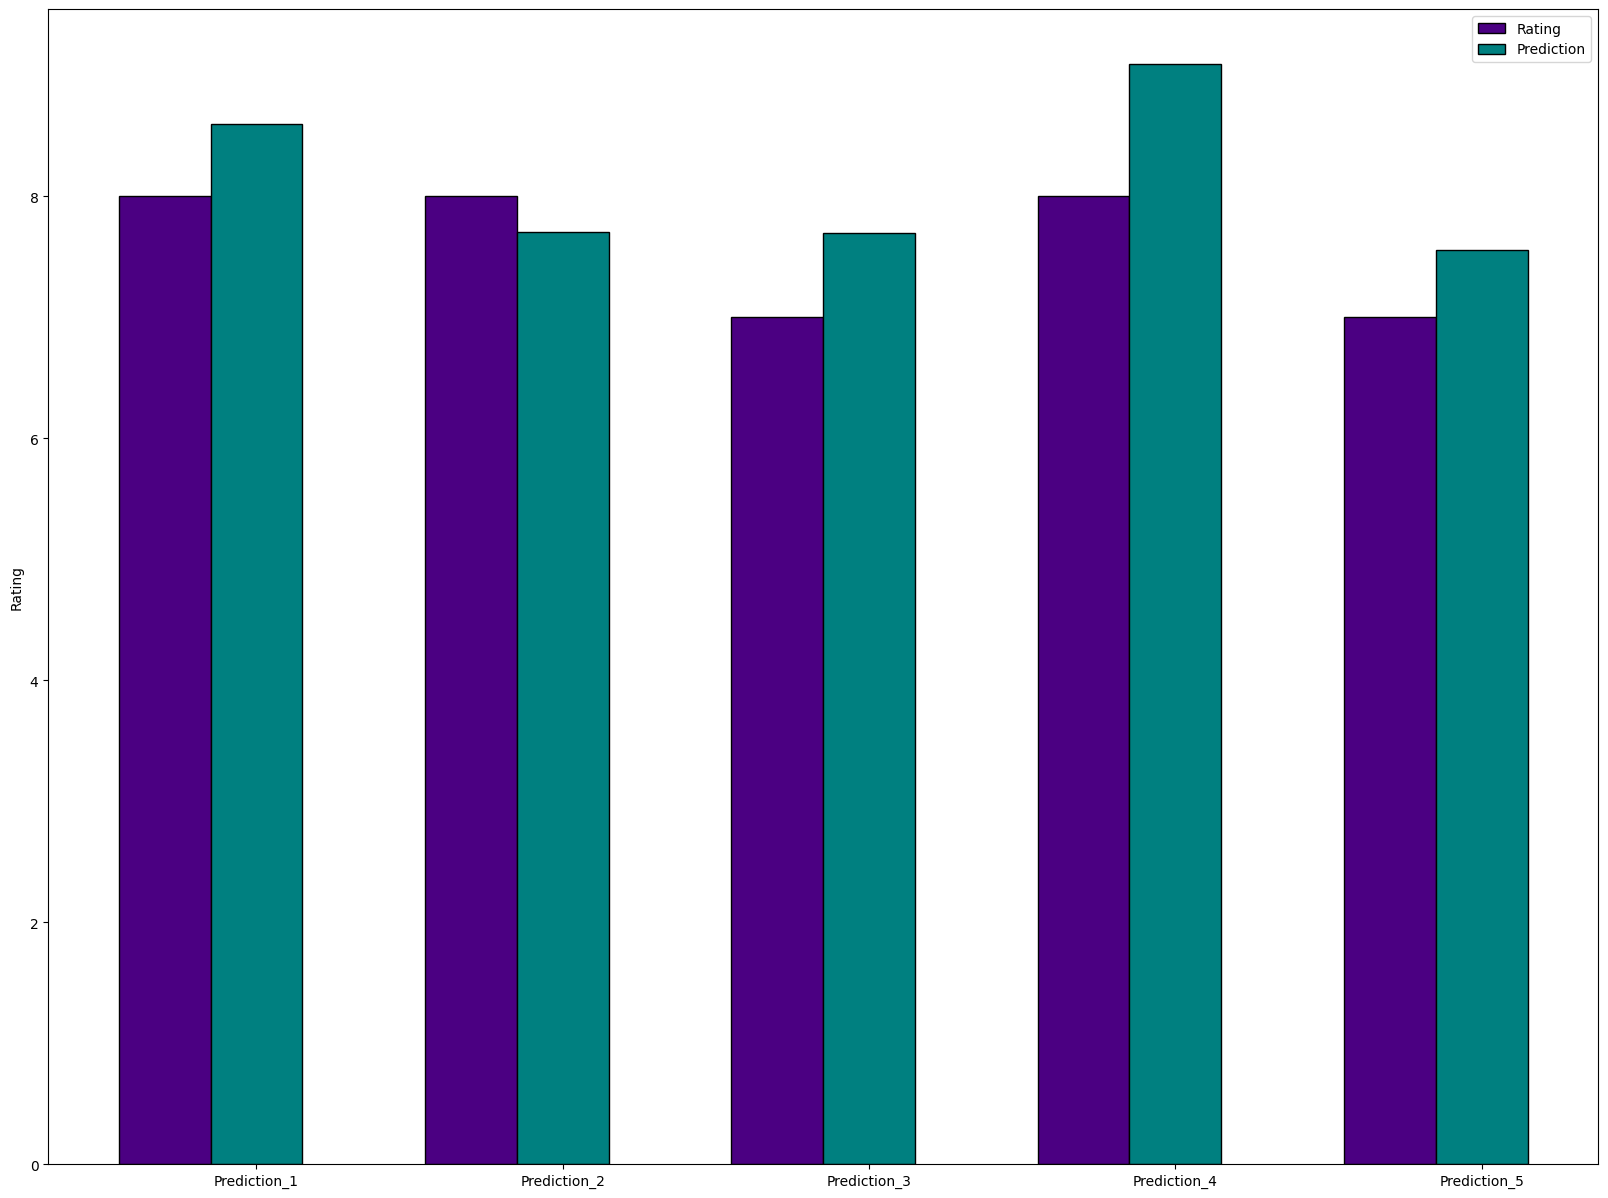

In [ ]:
rank, iter, lambda_ = 200, 10, 0.01
model = ALS.train(trainingData, rank=rank, iterations=iter, lambda_=lambda_, seed=5047)
predictions = model.predictAll(testData)
allPredictRatings=predictions.map(lambda l: float(l[2]))
arr_allPredictRatings=allPredictRatings.collect()
allTestRatings = testRatings.map(lambda l: l.split(',')).map(lambda l: (float(l[2])))
arr_allTestRatings=allTestRatings.collect()
calc_mse(arr_allTestRatings, arr_allPredictRatings)
plot_performance_evaluation_of_model(arr_allTestRatings, arr_allPredictRatings)

The Best Model

In [ ]:
rating = sc.textFile("/content/drive/MyDrive/Cloud_Computing/preprocessed_data/rating.csv")
header = rating.first() #extract header
rating = rating.filter(lambda row: row != header)   #filter out header
rating.take(3)

['2485327,59,6', '2485327,74,7', '2485327,120,8']

In [ ]:
rating = rating.map(lambda l: l.split(',')).map(lambda l: Rating(int(l[0]), int(l[1]), float(l[2])))
rating.take(3)

[Rating(user=2485327, product=59, rating=6.0),
 Rating(user=2485327, product=74, rating=7.0),
 Rating(user=2485327, product=120, rating=8.0)]

In [ ]:
rank, iter, lambda_ = 50, 10, 0.1
model_final = ALS.train(rating, rank=rank, iterations=iter, lambda_=lambda_, seed=5047)

In [ ]:
model_final.userFeatures().count()

1128

In [ ]:
model_final.productFeatures().count()

6562

In [ ]:
predicted_rating = model_final.predict(2485327, 59)
predicted_rating

6.318569696301273

In [ ]:
pip install matrix-factorization

  Preparing metadata (setup.py) ... done
  Created wheel for matrix-factorization: filename=matrix_factorization-1.3-py3-none-any.whl size=16447 sha256=e43893b10719b32cfec1b4ecf267226f37fcd4ea704d66a0be055817974cf2ea
  Stored in directory: /root/.cache/pip/wheels/20/55/7a/7f55628acaf4bc0adbb5199e744d098a483e01df9adf290f2f
Successfully built matrix-factorization


In [ ]:
from pyspark.mllib.recommendation import MatrixFactorizationModel

model_final.save(sc, "/content/drive/MyDrive/Cloud_Computing/model1")
# Load Model
sameModel = MatrixFactorizationModel.load(sc, "/content/drive/MyDrive/Cloud_Computing/model1")

Recommend the K number of animes for same user

In [ ]:
userId= 2485327
K=10
top_k_recs = sameModel.recommendProducts(userId,K)
for i in top_k_recs:
    print(i)

Rating(user=2485327, product=5114, rating=8.626901696185769)
Rating(user=2485327, product=28977, rating=8.59947920329657)
Rating(user=2485327, product=9969, rating=8.471378968203277)
Rating(user=2485327, product=15335, rating=8.377934359733882)
Rating(user=2485327, product=11061, rating=8.352191482481317)
Rating(user=2485327, product=34096, rating=8.288050837826896)
Rating(user=2485327, product=15417, rating=8.284163573718828)
Rating(user=2485327, product=918, rating=8.281317715058988)
Rating(user=2485327, product=28851, rating=8.237622764352656)
Rating(user=2485327, product=2904, rating=8.216317217242523)


In [ ]:
animes = spark.read.csv("./preprocessed_data/anime.csv", header=True)
animes = animes.dropna()
animes = animes.rdd

In [ ]:
anime_titles = animes.map(lambda line: line[:2]) \
                     .map(lambda x: (int(float(x[0])), x[1])).collectAsMap()

In [ ]:
anime_titles

{11013: 'Inu x Boku SS',
 2104: 'Seto no Hanayome',
 5262: 'Shugo Chara!! Doki',
 721: 'Princess Tutu',
 12365: 'Bakuman. 3rd Season',
 6586: 'Yume-iro Pâtissière',
 178: 'Ultra Maniac',
 2787: 'Shakugan no Shana II (Second)',
 4477: 'Nodame Cantabile: Paris-hen',
 853: 'Ouran Koukou Host Club',
 4814: 'Junjou Romantica 2',
 7054: 'Kaichou wa Maid-sama!',
 11123: 'Sekaiichi Hatsukoi 2',
 14227: 'Tonari no Kaibutsu-kun',
 269: 'Bleach',
 59: 'Chobits',
 6045: 'Kimi ni Todoke',
 1735: 'Naruto: Shippuuden',
 210: 'Ranma ½',
 4224: 'Toradora!',
 10030: 'Bakuman. 2nd Season',
 74: 'Gakuen Alice',
 4722: 'Skip Beat!',
 14397: 'Chihayafuru 2',
 1557: 'Shounen Onmyouji',
 10800: 'Chihayafuru',
 3731: 'Itazura na Kiss',
 9513: 'Beelzebub',
 5835: 'Hanasakeru Seishounen',
 9863: 'SKET Dance',
 7817: 'B-gata H-kei',
 966: 'Crayon Shin-chan',
 120: 'Fruits Basket',
 957: 'Saiunkoku Monogatari',
 21: 'One Piece',
 1974: 'Glass no Kamen (2005)',
 857: 'Air Gear',
 1914: 'Saiunkoku Monogatari 2nd Sea

In [ ]:
rating = rating.map(lambda x: Rating(int(x[0]), int(x[1]), float(x[2])))

In [ ]:
animes_for_user = rating.keyBy(lambda x: x.user)
animes_for_user.take(10)

[(2485327, Rating(user=2485327, product=59, rating=6.0)),
 (2485327, Rating(user=2485327, product=74, rating=7.0)),
 (2485327, Rating(user=2485327, product=120, rating=8.0)),
 (2485327, Rating(user=2485327, product=178, rating=5.0)),
 (2485327, Rating(user=2485327, product=210, rating=7.0)),
 (2485327, Rating(user=2485327, product=232, rating=9.0)),
 (2485327, Rating(user=2485327, product=249, rating=7.0)),
 (2485327, Rating(user=2485327, product=269, rating=8.0)),
 (2485327, Rating(user=2485327, product=853, rating=9.0)),
 (2485327, Rating(user=2485327, product=857, rating=7.0))]

In [ ]:
animes_for_user = rating.keyBy(lambda x: x.user).lookup(2485327)

In [ ]:
len(animes_for_user)

3012

In [ ]:
animes_for_user.sort(reverse=True,key= lambda x: x.rating)

In [ ]:
animes_for_user

[Rating(user=2485327, product=16, rating=10.0),
 Rating(user=2485327, product=392, rating=10.0),
 Rating(user=2485327, product=777, rating=10.0),
 Rating(user=2485327, product=877, rating=10.0),
 Rating(user=2485327, product=918, rating=10.0),
 Rating(user=2485327, product=1535, rating=10.0),
 Rating(user=2485327, product=1575, rating=10.0),
 Rating(user=2485327, product=1604, rating=10.0),
 Rating(user=2485327, product=2904, rating=10.0),
 Rating(user=2485327, product=4081, rating=10.0),
 Rating(user=2485327, product=5114, rating=10.0),
 Rating(user=2485327, product=9969, rating=10.0),
 Rating(user=2485327, product=10087, rating=10.0),
 Rating(user=2485327, product=10408, rating=10.0),
 Rating(user=2485327, product=11061, rating=10.0),
 Rating(user=2485327, product=11741, rating=10.0),
 Rating(user=2485327, product=12531, rating=10.0),
 Rating(user=2485327, product=13601, rating=10.0),
 Rating(user=2485327, product=15335, rating=10.0),
 Rating(user=2485327, product=15417, rating=10.0)

10 animes with the highest ratings for user 2485327

In [ ]:
sc.parallelize(animes_for_user[:10])\
.map(lambda rating: (anime_titles[rating.product], rating.rating)).collect()

[('Hachimitsu to Clover', 10.0),
 ('Yuu☆Yuu☆Hakusho', 10.0),
 ('Hellsing Ultimate', 10.0),
 ('Nana', 10.0),
 ('Gintama', 10.0),
 ('Death Note', 10.0),
 ('Code Geass: Hangyaku no Lelouch', 10.0),
 ('Katekyo Hitman Reborn!', 10.0),
 ('Code Geass: Hangyaku no Lelouch R2', 10.0),
 ('Natsume Yuujinchou', 10.0)]

Top 10 recommendations for user 2485327

In [ ]:
sc.parallelize(top_k_recs)\
.map(lambda rating: (anime_titles[rating.product], rating.rating))\
.collect()

[('Fullmetal Alchemist: Brotherhood', 8.604624050269754),
 ('Gintama°', 8.578858356319806),
 ('Gintama&#039;', 8.450538872916834),
 ('Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare', 8.348866375006146),
 ('Hunter x Hunter (2011)', 8.315705041905519),
 ('Gintama.', 8.270241019462864),
 ('Gintama', 8.268046259273754),
 ('Gintama&#039;: Enchousen', 8.263535892421748),
 ('Koe no Katachi', 8.199993627404377),
 ('Code Geass: Hangyaku no Lelouch R2', 8.193178112804986)]

Recommend the top-K users for a given product

In [ ]:
productID = 1575
K = 10
topKuser= model.recommendUsers(productID,K)
for i in topKuser:
    print(i)

Rating(user=3717201, product=1575, rating=10.91952844517011)
Rating(user=187070, product=1575, rating=10.743225993058324)
Rating(user=37830, product=1575, rating=10.529058380473131)
Rating(user=3535317, product=1575, rating=10.5120109524083)
Rating(user=5330916, product=1575, rating=10.482639712521365)
Rating(user=321224, product=1575, rating=10.45610420066881)
Rating(user=2528591, product=1575, rating=10.442612993954825)
Rating(user=149805, product=1575, rating=10.425730697130227)
Rating(user=1396673, product=1575, rating=10.422951680546216)
Rating(user=6493369, product=1575, rating=10.421469471847235)


In [ ]:
IDs_with_users = {v: k for k, v in users_with_IDs.items()}

Top 10 users for anime 1575

In [ ]:
sc.parallelize(topKuser)\
.map(lambda rating: (IDs_with_users[rating.user], rating.user))\
.collect()

[('OrangeJP', 3717201),
 ('Blutsauger', 187070),
 ('Bleach2903', 37830),
 ('NoFear94', 3535317),
 ('animangafreak_ZX', 5330916),
 ('mangafreakZX', 321224),
 ('Mikura-san', 2528591),
 ('Insaner', 149805),
 ('Deodatus', 1396673),
 ('Z3R0215', 6493369)]

################################################

COSINE SIMILARITY

################################################

In [ ]:
def cosineSimilarity(item_id,a,b):
    dot=np.dot(a,b)
    norma = np.linalg.norm(a)
    normb = np.linalg.norm(b)
    cos= dot/ (norma*normb)
    return item_id,cos

In [ ]:
item_id=1575
item_vector= model.productFeatures().lookup(item_id)[0]
item_vector

array('d', [0.1051260307431221, -0.3608165979385376, 0.17018842697143555, -0.8416979312896729, -0.07852023839950562, 0.4744715690612793, -0.203826442360878, 0.8742927312850952, -0.5257149934768677, -0.1195378452539444, 0.40717509388923645, 0.7782883048057556, 0.31561973690986633, -0.6437272429466248, 0.3100683391094208, 0.053070973604917526, 0.6793628334999084, -0.13710960745811462, 0.011507556773722172, 0.36859557032585144, 0.2708421051502228, 0.02490358240902424, -0.2877660393714905, -0.5923475623130798, -0.1430794596672058, 0.2150927484035492, -0.5587209463119507, 0.43303343653678894, -0.31505733728408813, 0.019449861720204353, -0.08730537444353104, 0.22476708889007568, -0.6044133901596069, 0.5923047065734863, -0.19442372024059296, -0.032212577760219574, -0.5002377033233643, 0.28035634756088257, 0.2979603409767151, -0.583759605884552, -0.6487153172492981, -0.2596248388290405, -0.33610063791275024, -0.316127747297287, 0.5092137455940247, 0.33450421690940857, 0.6262254118919373, -0.45

In [ ]:
anime_titles[item_id]

'Code Geass: Hangyaku no Lelouch'

In [ ]:
cosineSimilarity(item_id,item_vector,item_vector)

(1575, 1.0)

In [ ]:
sims= model.productFeatures().map(lambda data: cosineSimilarity(data[0],data[1],item_vector))
top_10_animes = sims.top(10,key=lambda x:x[1])
top_10_animes

[(1575, 1.0),
 (2904, 0.9916148768107302),
 (1535, 0.9692418266740028),
 (28701, 0.9641875052401006),
 (5114, 0.9628643145538743),
 (10030, 0.9625816937009062),
 (11741, 0.9616054318643035),
 (73, 0.9594466084994436),
 (1889, 0.9590255723320348),
 (13601, 0.958501290204687)]

In [ ]:
top_10_animes_titles = [anime_titles[a[0]] for a in top_10_animes]
top_10_animes_titles

['Code Geass: Hangyaku no Lelouch',
 'Code Geass: Hangyaku no Lelouch R2',
 'Death Note',
 'Fate/stay night: Unlimited Blade Works 2nd Season',
 'Fullmetal Alchemist: Brotherhood',
 'Bakuman. 2nd Season',
 'Fate/Zero 2nd Season',
 'Full Metal Panic! The Second Raid',
 'Higurashi no Naku Koro ni Kai',
 'Psycho-Pass']